In [2]:
import pandas as pd
import numpy as np

In [3]:
cars = pd.read_csv('autoscout24-germany-dataset.csv')

In [4]:
cars

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

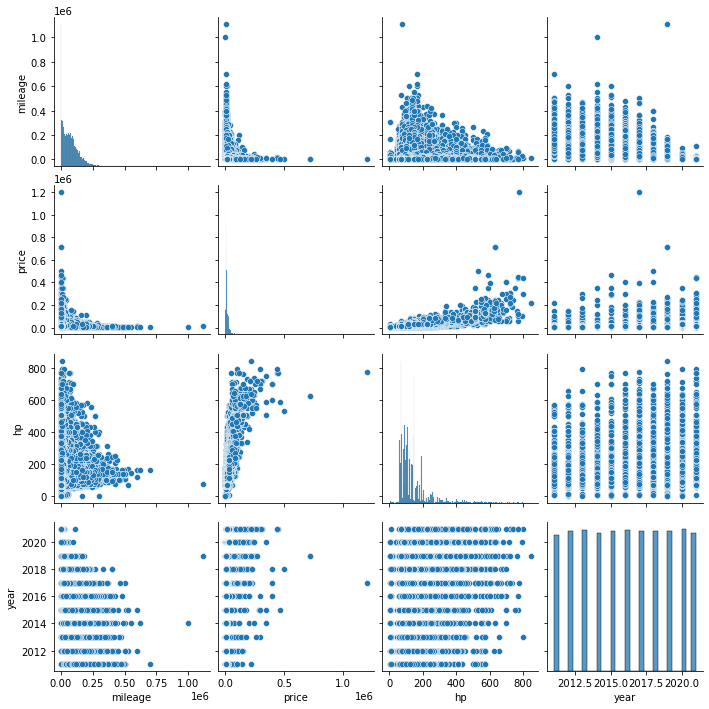

In [29]:
sns.pairplot(cars)

Есть прямая зависимость между ценой и мощностью автомоблией, а также обратная зависимость между ценой и пробегом. 

In [7]:
car_by_years = cars.groupby(by='year')

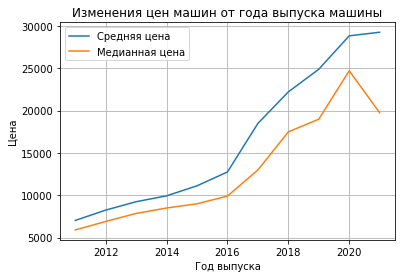

In [8]:
ch_pr = car_by_years['price'].mean().plot(title='Изменения цен машин от года выпуска машины',
                           xlabel='Год выпуска',
                           ylabel='Цена')
car_by_years['price'].median().plot(title='Изменения цен машин от года выпуска машины',
                           xlabel='Год выпуска',
                           ylabel='Цена',
                           grid=True)
ch_pr.legend(loc='upper left', labels=['Средняя цена', 'Медианная цена'])

Вполне естественно, что чем новее машина, то тем дороже она стоит. Однако если брать цены за 2021 год, то наблюдается сильное расхождение между средней ценой и медианой, а также расхождение в тенеденциях.По среденей цене цены на автомобли 2021 года выросли но значительно меньше чем ранее, но по медиане они наооборт ценятся меньше чем автомобли 2020 года, примерно как автомобли 2019 года. Возможно влияние выбросов, на статитистику.

In [9]:
cars.make.unique()

array(['BMW', 'Volkswagen', 'SEAT', 'Renault', 'Peugeot', 'Toyota',
       'Opel', 'Mazda', 'Ford', 'Mercedes-Benz', 'Chevrolet', 'Audi',
       'Fiat', 'Kia', 'Dacia', 'MINI', 'Hyundai', 'Skoda', 'Citroen',
       'Infiniti', 'Suzuki', 'SsangYong', 'smart', 'Cupra', 'Volvo',
       'Jaguar', 'Porsche', 'Nissan', 'Honda', 'Lada', 'Mitsubishi',
       'Others', 'Lexus', 'Jeep', 'Maserati', 'Bentley', 'Land', 'Alfa',
       'Subaru', 'Dodge', 'Microcar', 'Lamborghini', 'Baic', 'Tesla',
       'Chrysler', '9ff', 'McLaren', 'Aston', 'Rolls-Royce', 'Alpine',
       'Lancia', 'Abarth', 'DS', 'Daihatsu', 'Ligier', 'Ferrari',
       'Caravans-Wohnm', 'Aixam', 'Piaggio', 'Zhidou', 'Morgan',
       'Maybach', 'Tazzari', 'Trucks-Lkw', 'RAM', 'Iveco', 'DAF',
       'Alpina', 'Polestar', 'Brilliance', 'FISKER', 'Cadillac',
       'Trailer-Anhänger', 'Isuzu', 'Corvette', 'DFSK', 'Estrima'],
      dtype=object)

<AxesSubplot:title={'center':'Цены на автомобли'}>

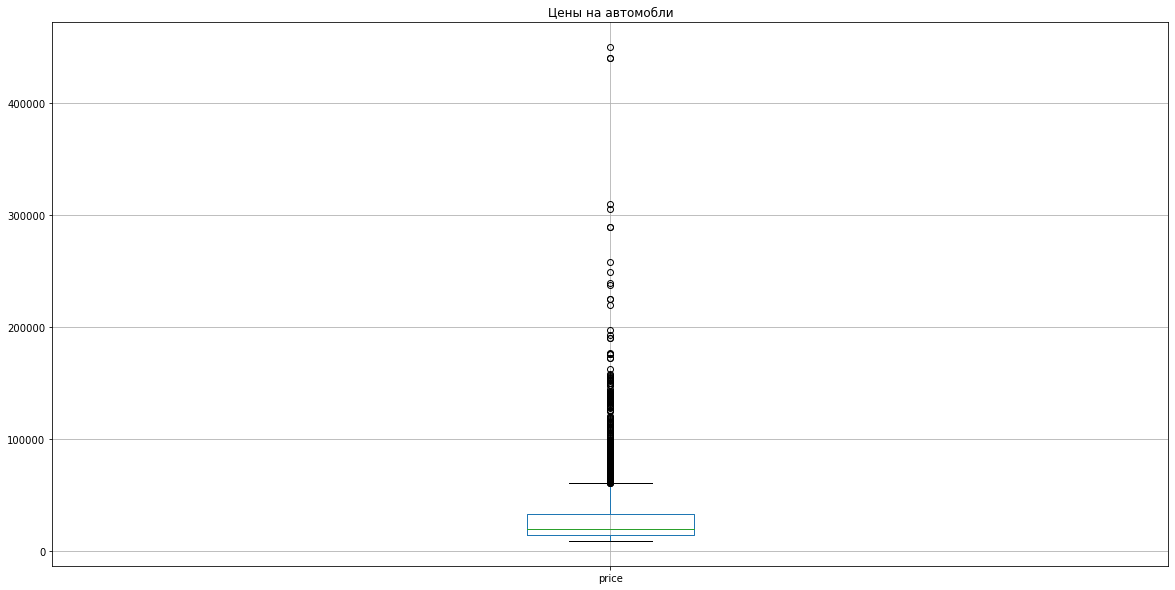

In [10]:
cars[cars.year == 2021].price.plot(kind='box', title='Цены на автомобли', grid=True, figsize=(20, 10))

<AxesSubplot:title={'center':'Цены на автомобли'}>

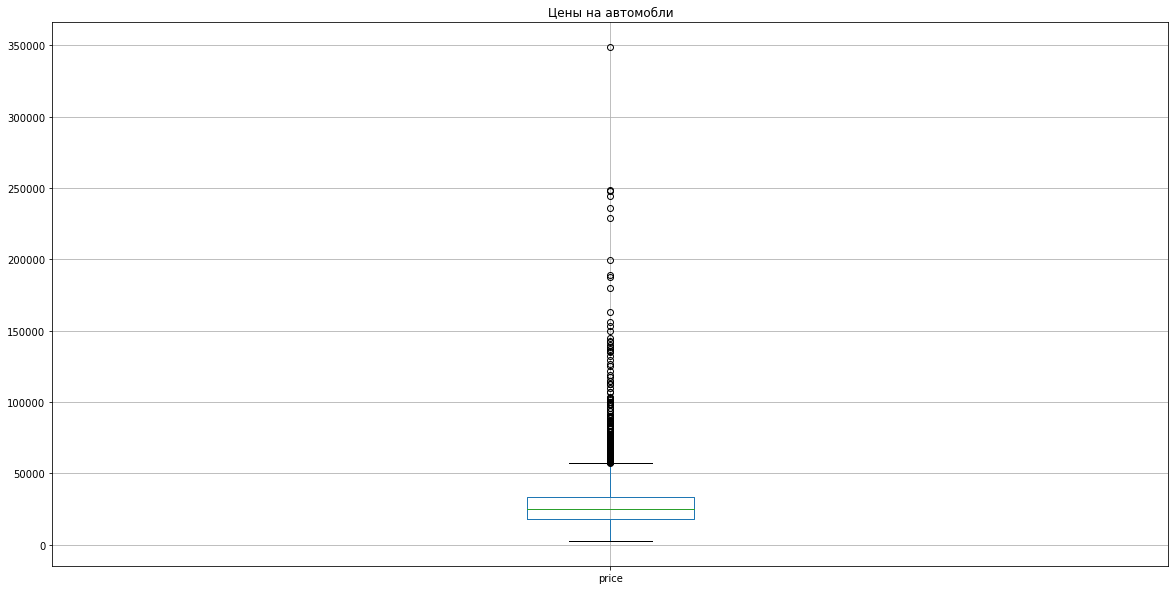

In [233]:
cars[cars.year == 2020].price.plot(kind='box', title='Цены на автомобли', grid=True, figsize=(20, 10))

В обоих случаях есть большое число выбросов. Думаю эти машины из премиального сегмента либо суперкары, которые значительно дороже других машин. Также видно, что дорогие автомобли 2021 года дороже чем машины 2020 года. Но в тоже время цены на машины среднего класса и дешевые 2021 года наооборот цены стали ниже чем в прошлом году, что видны теперь не только по медиане. Возможно это связано с тем, что меньше представленно автомоблей более дорогих марок. Пандемия, а также кризис полупроводников создал дефицит автомобилей с продвинтуой электроникой, а также простойкой заводов. В то же время дешевые машины производства 21 года без наворотов могли заполнить рынок.

<AxesSubplot:title={'center':'Цены машин 20 года в зависимости от пробега и мощности'}, xlabel='price', ylabel='mileage'>

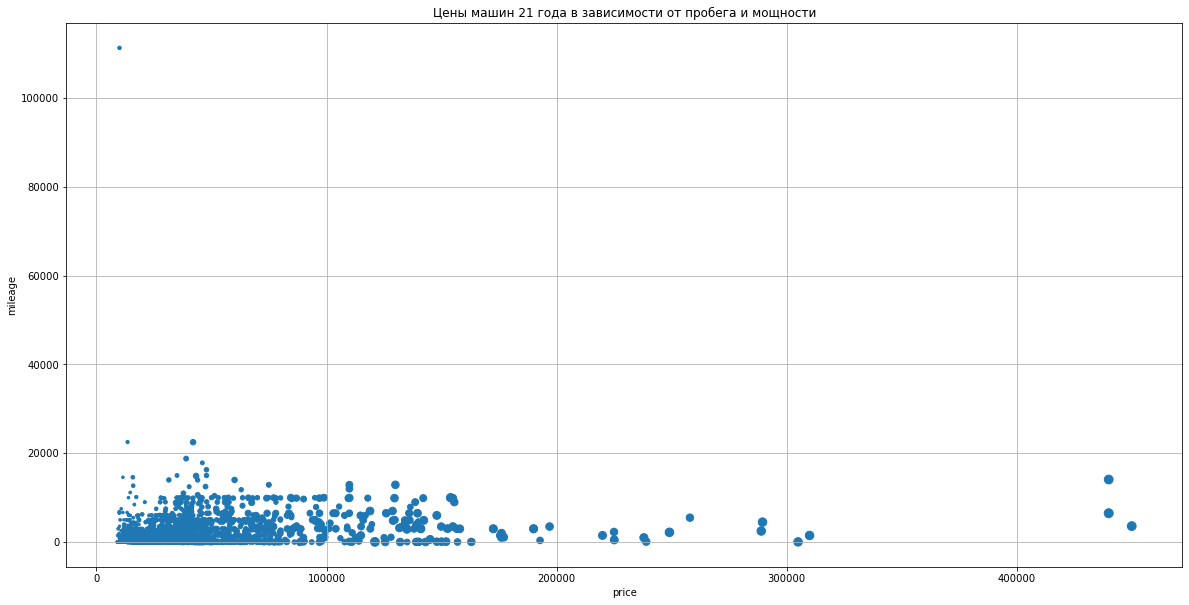

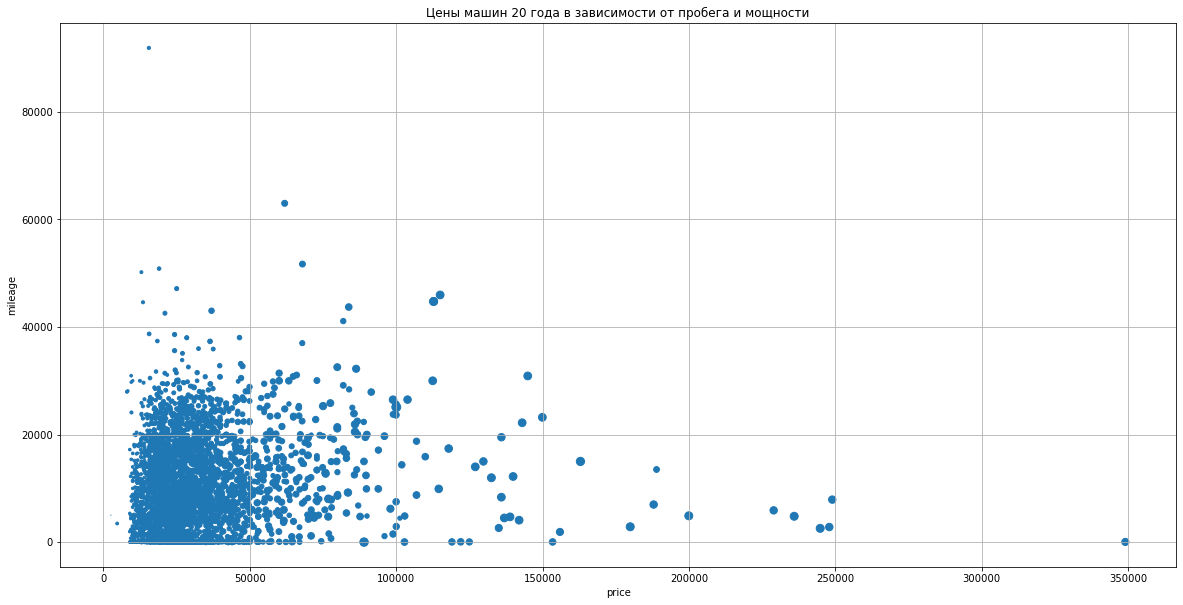

In [11]:
cars[cars.year == 2021].plot(kind='scatter', x='price', y='mileage', s=cars[cars.year == 2021].hp/10, figsize=(20, 10), grid=True,
                            title='Цены машин 21 года в зависимости от пробега и мощности')
cars[cars.year == 2020].plot(kind='scatter', x='price', y='mileage', s=cars[cars.year == 2020].hp/10, figsize=(20, 10), grid=True,
                            title='Цены машин 20 года в зависимости от пробега и мощности')

Вполне естесвенно, что машин производства 20 года с большим пробегом гораздо больше чем 21 года. Однако касаемо цен, можно наблюдать увеличение количесвто мощных машин за большую цену. Иначе говоря хвост машин 21 года длинее и плотнее чем машин 20 года по оси цен.Естесвенно это связано с новизной машин, что обуславливает более высокую цену. Однако разница с прошлогодними машинами довольно значительная, обычно так сильно машины за год не дешевеют. Возможно это опятже влияние кризиса с полупровдниками и ковидом, но надо смотреть соотноешение на другой визуализации тут не сильно понятно.

In [12]:
cars[cars.year == 2021].make.value_counts()

Skoda            403
Fiat             356
Hyundai          355
Volkswagen       350
Renault          337
Opel             270
Toyota           249
Ford             244
Kia              226
SEAT             161
Mercedes-Benz    138
Audi             122
Mazda            110
Dacia            103
Nissan            96
Citroen           95
Peugeot           93
Mitsubishi        59
Porsche           50
Jeep              49
Cupra             44
Suzuki            44
BMW               32
Land              28
Volvo             27
Alfa              19
Jaguar            17
Aston             15
Abarth            12
Lada              11
smart              9
Lexus              7
Subaru             6
SsangYong          5
DS                 4
MINI               4
Cadillac           4
Ferrari            4
Dodge              3
Polestar           3
Others             3
Bentley            2
Aixam              2
Alpine             2
Lamborghini        2
Tesla              2
DFSK               1
McLaren      

In [13]:
make_cars = cars.pivot_table(index='year', columns='make', values='price', aggfunc='count')

In [14]:
makes = ['BMW', 'Porsche', 'Audi', 'Mercedes-Benz', 'Volkswagen', 'Fiat', 'Renault', 'Hyundai', 'Toyota', 'Mazda']

In [15]:
make_cars[makes]

make,BMW,Porsche,Audi,Mercedes-Benz,Volkswagen,Fiat,Renault,Hyundai,Toyota,Mazda
year,,,,,,,,,,
2011,234.0,14.0,201.0,262.0,695.0,157.0,253.0,153.0,106.0,66.0
2012,276.0,18.0,237.0,262.0,652.0,123.0,223.0,157.0,119.0,64.0
2013,278.0,3.0,189.0,250.0,662.0,147.0,193.0,168.0,123.0,63.0
2014,228.0,10.0,196.0,190.0,601.0,155.0,221.0,167.0,116.0,58.0
2015,183.0,13.0,133.0,175.0,677.0,133.0,293.0,177.0,110.0,44.0
2016,152.0,14.0,152.0,175.0,667.0,119.0,340.0,155.0,115.0,40.0
2017,285.0,30.0,335.0,247.0,729.0,99.0,210.0,104.0,79.0,48.0
2018,374.0,46.0,466.0,206.0,585.0,98.0,168.0,117.0,103.0,40.0
2019,182.0,35.0,276.0,262.0,592.0,130.0,276.0,160.0,95.0,68.0


<AxesSubplot:xlabel='make', ylabel='year'>

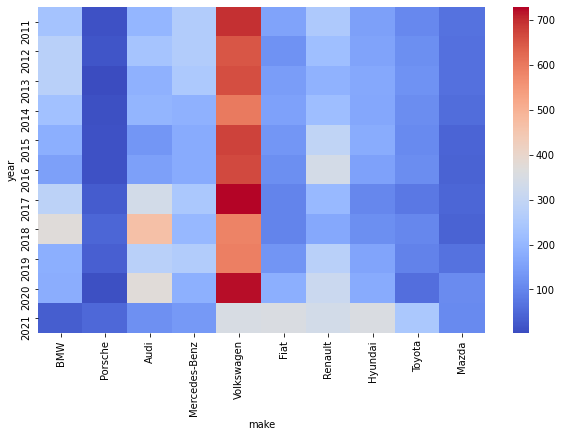

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(make_cars[makes], ax=ax, cmap='coolwarm')

По этой температурной карте можно увидеть, что число машин, выпущенных в 2021 году немецкими марками сильно меньше чем в прошлые. При этом они все из премиальной категории, кроме Фольксвагена(хотя их машины тоже далеко не самые доступные по цене). В то же время мы можем увидеть увелечение числа автомобилей 21 года менее дорогих европейских(не немецких) марок и японских, корейских марок среденего класса(Хёнде, Тойота). При этом если брать корейцев, то они в целом дешевле чем Фольксваген при близком качестве, что может объяснить меньшую медиану при таком же количестве машин с среденем сегменте. В целом можно сказать, что сегементе автомобилей 2021 года, то есть самых новых автомоблей расспределение машин идёт не в пользу немецкого автопрома. Сильно проселе премиальный сегмент, а также Фольксваген одна из популярнейших марок в Германии. Освободившиеся место заняли азиатские производители, а также машины из более дешевого сегмента. Скорее всего здесь есть большое влияние кризиса полупроводников, то есть их дефецит. У азаиатов, особенно корейцев лучше дела с их наличием, а также там меньше было ограничений из-за пандемии чес в Германии, что позволило выпустить достаточные количество машин. В Германии  же не могут сейчас проводить большое количество, что привело к их дефециту, а соответсвенно к значительному росту цен на свежевыпущенные машины. Это привело к появлению выброса и искажению статистики в случае среденей.

In [17]:
mean_cars = cars.pivot_table(index='year', columns='make', values='price', aggfunc='mean')[makes]

In [18]:
mean_cars

make,BMW,Porsche,Audi,Mercedes-Benz,Volkswagen,Fiat,Renault,Hyundai,Toyota,Mazda
year,,,,,,,,,,
2011,9765.427350,54041.857143,10087.482587,12253.473282,7800.322302,4798.095541,4659.146245,5304.895425,6069.877358,6175.212121
2012,11387.764493,49353.611111,12762.071730,14552.889313,8129.593558,5427.918699,5342.313901,6383.617834,7304.781513,8012.578125
2013,13217.205036,93863.333333,15351.169312,15345.904000,9843.255287,6209.278912,5978.098446,7136.595238,8364.902439,9875.507937
2014,14578.995614,60163.000000,14273.489796,19811.031579,10519.720466,7086.032258,6996.733032,7796.299401,9201.974138,10508.810345
2015,16365.639344,45822.307692,17524.368421,21534.331429,11706.774003,8052.496241,8096.668942,8726.836158,9308.354545,12529.454545
2016,20850.513158,67932.785714,24078.065789,26921.194286,12982.194903,8705.621849,8931.097059,10359.374194,10629.939130,13256.050000
2017,29774.431579,78260.300000,30085.119403,31281.052632,15190.013717,9494.929293,11130.490476,12392.134615,13204.848101,17228.645833
2018,31837.117647,101038.586957,33528.982833,37686.398058,18294.145299,10480.418367,12647.714286,12648.333333,13050.621359,19698.275000
2019,38318.714286,99446.314286,42105.699275,46363.881679,26536.907095,12415.000000,15719.855072,15289.268750,17186.242105,23624.161765


<AxesSubplot:title={'center':'Средняя цена на автомобиль в 2021 году'}, xlabel='make'>

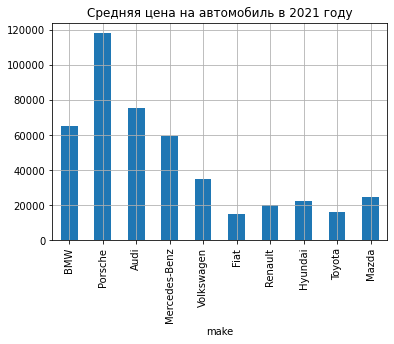

In [33]:
mean_cars.iloc[-1].plot(kind='bar', title='Средняя цена на автомобиль в 2021 году', grid=True)

<AxesSubplot:title={'center':'Средняя цена на автомобиль в 2020 году'}, xlabel='make'>

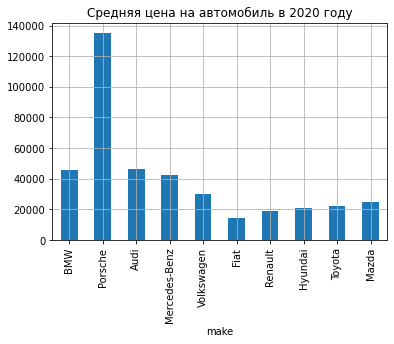

In [34]:
mean_cars.iloc[-2].plot(kind='bar', title='Средняя цена на автомобиль в 2020 году', grid=True)

Цены на немецкие машины 21 года выше чем за 20 год(за исключением Порше, но машин этой марки продаётся, но это более эксклюзивная марка. В то же время на машины остальных марок цены практически не изменились. Здесь может быть влияние бытсрого падения цен именно на немецкие марки, но все таки настолько сильно за год они не падают. Плюс численность немецких машин упала на немецком рынке, а всех остальных возрасло. Немецкая автомоблиная промышленость зависит от электонных компонентов, что не очень у немцев в отличие от азиатских производтилей, а касаемо Рено и Фиата, то там не такого количесвто электроники, так как они расчитнаны на менее дорогой сегмент автомоблией. Так что я думаю, что помимо коронкризиса, на немецких производителей оказывает нехватка электронных компонентов для их автомобилей, что привело к уменьшению их производства, плюл короновирусные ограничения в Германии. Тем не менее спрос на премальный сегмент остался высоким, что привело к скачку цен. Это соотвсвенно и превело к выбросам и скачку графике медианной цены, предположительно.